In [ ]:
pip install sdv

     |████████████████████████████████| 103 kB 5.2 MB/s 
     |████████████████████████████████| 97 kB 3.3 MB/s 
     |████████████████████████████████| 1.2 MB 12.9 MB/s 
     |████████████████████████████████| 52 kB 451 kB/s 
     |████████████████████████████████| 45 kB 946 kB/s 
     |████████████████████████████████| 46 kB 507 kB/s 
     |████████████████████████████████| 11.2 MB 54.5 MB/s 
     |████████████████████████████████| 38.1 MB 8.0 MB/s 
     |████████████████████████████████| 930 kB 51.1 MB/s 
     |████████████████████████████████| 636 kB 45.6 MB/s 
     |████████████████████████████████| 280 kB 48.0 MB/s 
     |████████████████████████████████| 2.5 MB 39.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting un

In [ ]:
!git clone https://github.com/JkbRnc/Data_Generators.git

Cloning into 'Data_Generators'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 117 (delta 36), reused 94 (delta 25), pack-reused 0
Receiving objects: 100% (117/117), 1.09 MiB | 8.88 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# Imports

In [ ]:
from Data_Generators.evaluate.eval import create_statistics, evaluate_randomforest, evaluate_knn, distance

In [ ]:
from sdv.tabular import CTGAN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Extra functions

In [ ]:
def create_statistics_(data, target_column, model, categorical_columns = [], k = 100, classification=False, method='randomforest', sample_size=10000):
  model.fit(data)
  model_score = []
  test_score = []
  for _ in range(k):
    samples_df = model.sample(sample_size)
    
    if method == 'randomforest':
      x, y = evaluate_randomforest(data, samples_df, target_column=target_column, classification=classification)
    else:
      x, y = evaluate_knn(data, samples_df, target_column=target_column, classification=classification)
    model_score.append(x)
    test_score.append(y)
  return np.array(model_score), np.array(test_score)

# Real estate dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/real_estate.csv'
real_estate = pd.read_csv(url, sep=',')

In [ ]:
model = CTGAN(generator_dim = [512], discriminator_dim=[512], epochs=600, discriminator_steps=5, generator_lr=0.002, discriminator_lr=0.002)
model.fit(real_estate)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

In [ ]:
samples = model.sample(10000)

<AxesSubplot:>

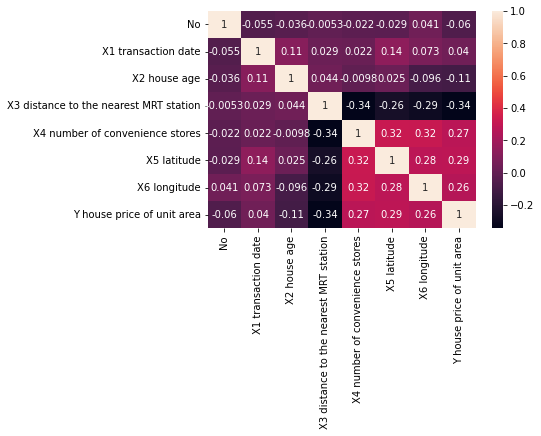

In [ ]:
sn.heatmap(samples.corr(), annot=True)

<AxesSubplot:>

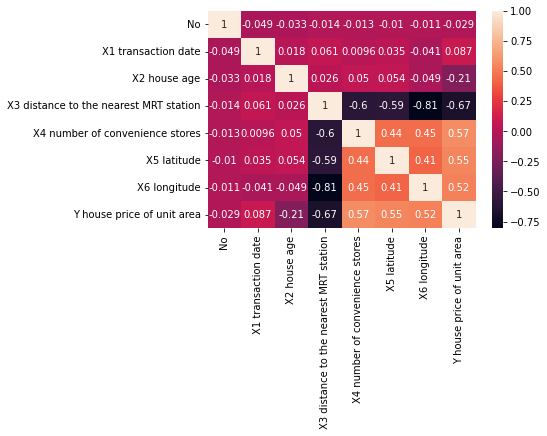

In [ ]:
sn.heatmap(real_estate.corr(), annot=True)

In [ ]:
distance(real_estate.corr(), samples.corr())

0.02083202617033801

In [ ]:
model = CTGAN(generator_dim = [512], discriminator_dim=[512], epochs=800, discriminator_steps=5, generator_lr=0.002, discriminator_lr=0.002)
x, y = create_statistics_(data=real_estate, categorical_columns=['Y house price of unit area'], target_column='Y house price of unit area', model=model, sample_size=real_estate.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

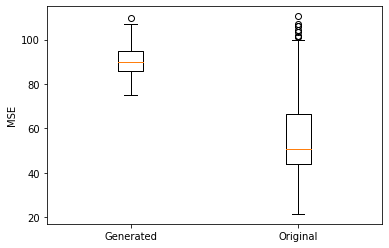

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([x, y])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
x.mean()

90.34415893886472

In [ ]:
y.mean()

59.37858066336536

In [ ]:
model = CTGAN(generator_dim = [512], discriminator_dim=[512], epochs=600, discriminator_steps=5, generator_lr=0.002, discriminator_lr=0.002, embedding_dim=32)
x, y = create_statistics_(data=real_estate, categorical_columns=['Y house price of unit area'], target_column='Y house price of unit area', model=model, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111

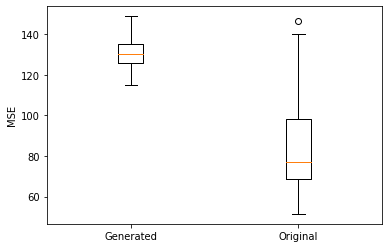

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([x, y])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
x.mean() # 124.07160368115943

130.24717821256039

<AxesSubplot:>

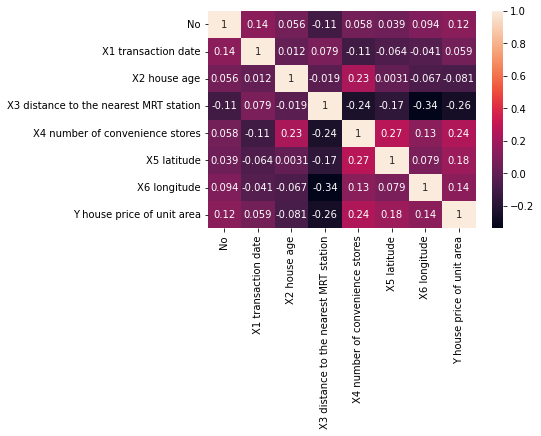

In [ ]:
samples = model.sample(1000)
sn.heatmap(samples.corr(), annot=True)

# Dry Bean dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/dry_bean.csv'
beans = pd.read_csv(url, sep=';')

In [ ]:
model=CTGAN(discriminator_steps=5)
data1, data2 = create_statistics_(beans, 'Class', model=model, classification=True)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

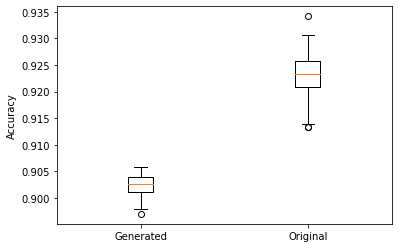

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.9023885092939534

In [ ]:
model=CTGAN(discriminator_steps=5)
data1, data2 = create_statistics_(beans, 'Class', model=model, classification=True, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

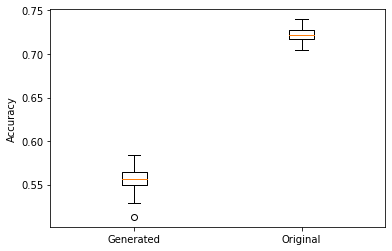

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.5567011975607964

In [ ]:
data2.mean()

In [ ]:
samples= model.sample(10000)
distance(beans.corr(), samples.corr())

0.005996437073296693

# Breast cancer dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/breast_cancer.csv'
bc =  pd.read_csv(url, sep=',')

In [ ]:
model = CTGAN(discriminator_steps=5, epochs=500)
data1, data2 = create_statistics_(bc, 'Classification', model, ['Classification'],classification=True)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_nam

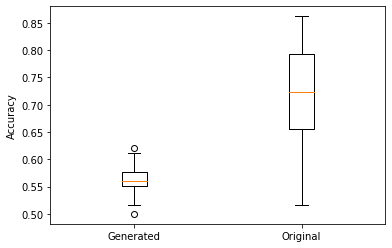

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.5624137931034482

In [ ]:
data2.mean()

0.7182758620689657

In [ ]:
model = CTGAN(discriminator_steps=5, epochs=500)
data1, data2 = create_statistics_(bc, 'Classification', model, ['Classification'],classification=True, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_nam

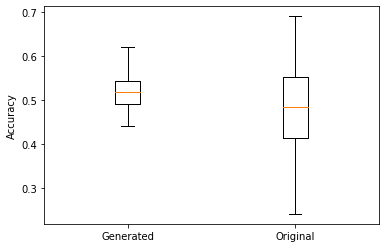

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.5232758620689655

In [ ]:
data2.mean()

0.4882758620689655

In [ ]:
samples = model.sample(10000)

In [ ]:
distance(bc.corr(), samples.corr())

0.025164544916448702

# WSNs dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/wsns.csv'
wsns = pd.read_csv(url, sep=',')

In [ ]:
wsns.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [ ]:
wsns = wsns.drop(['sd_ale'], axis=1)

In [ ]:
wsns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 4.3 KB


In [ ]:
model = CTGAN(discriminator_steps=5, epochs=500)
data1, data2 = create_statistics_(wsns, 'ale', model,classification=False)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

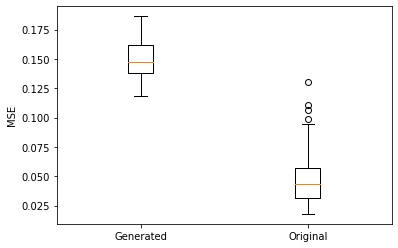

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.14931998780785208

In [ ]:
data2.mean()

0.04636279709099333

In [ ]:
model = CTGAN(discriminator_steps=5, epochs=500)
data1, data2 = create_statistics_(wsns, 'ale', model, classification=False)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

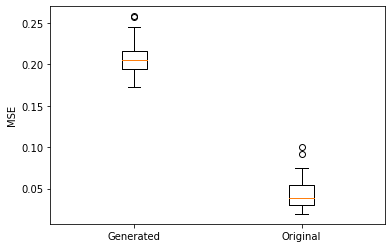

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.20590475725679153

In [ ]:
data2.mean()

0.04301135055512308

In [ ]:
samples = model.sample(10000)
distance(wsns.corr(), samples.corr())

0.03920426207650703